In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

# Seq-LM-EMD

In [2]:
from src.models.model import Seq_LM_EMD

In [11]:
model = Seq_LM_EMD(
    model="sentence-transformers/distiluse-base-multilingual-cased-v2", 
    tokenizer="sentence-transformers/distiluse-base-multilingual-cased-v2", 
    dist_type="seq",
    reg1=0.3, 
    reg2=0.3,
    nit=10
)

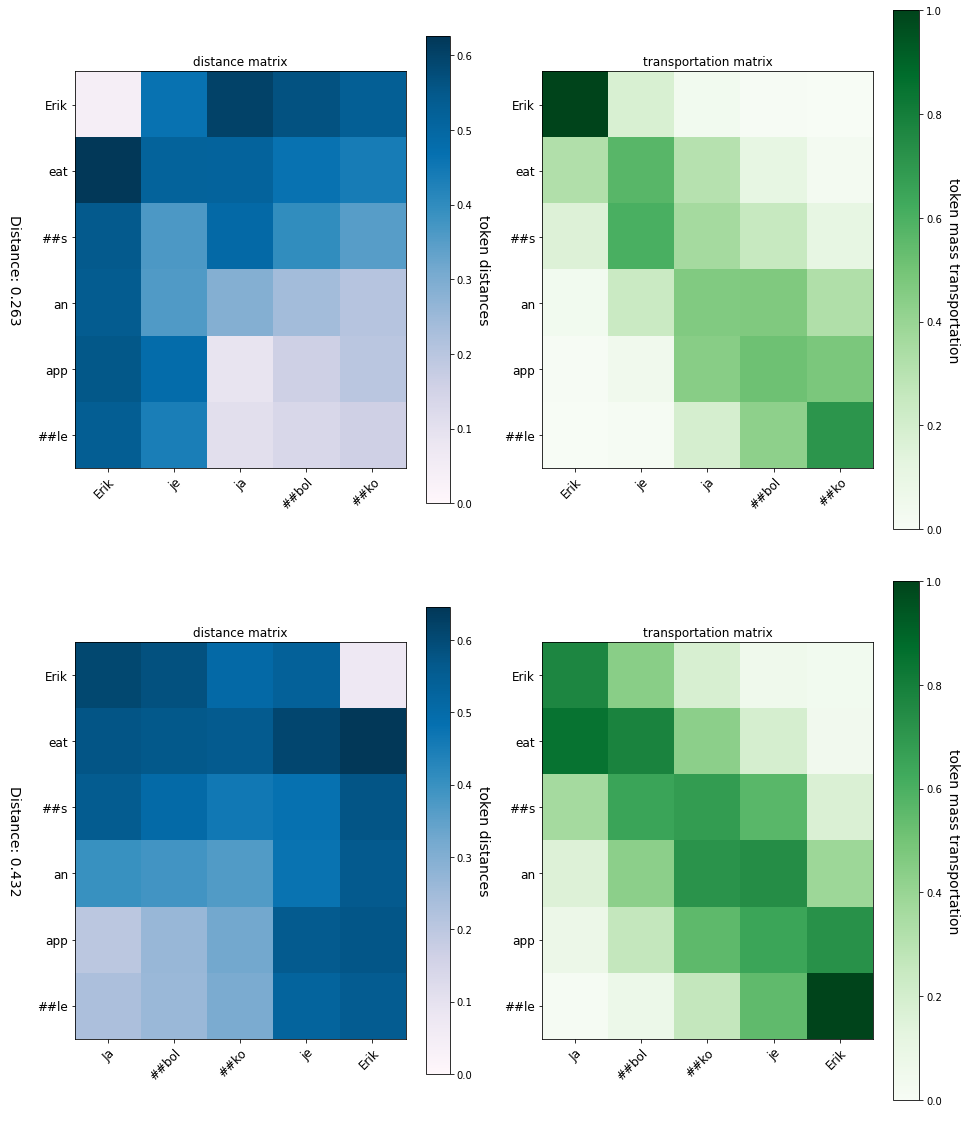

In [12]:
system_text = "Erik eats an apple"
references = [
    "Erik je jabolko",
    "Jabolko je Erik",
]
model.visualize(system_text, references)

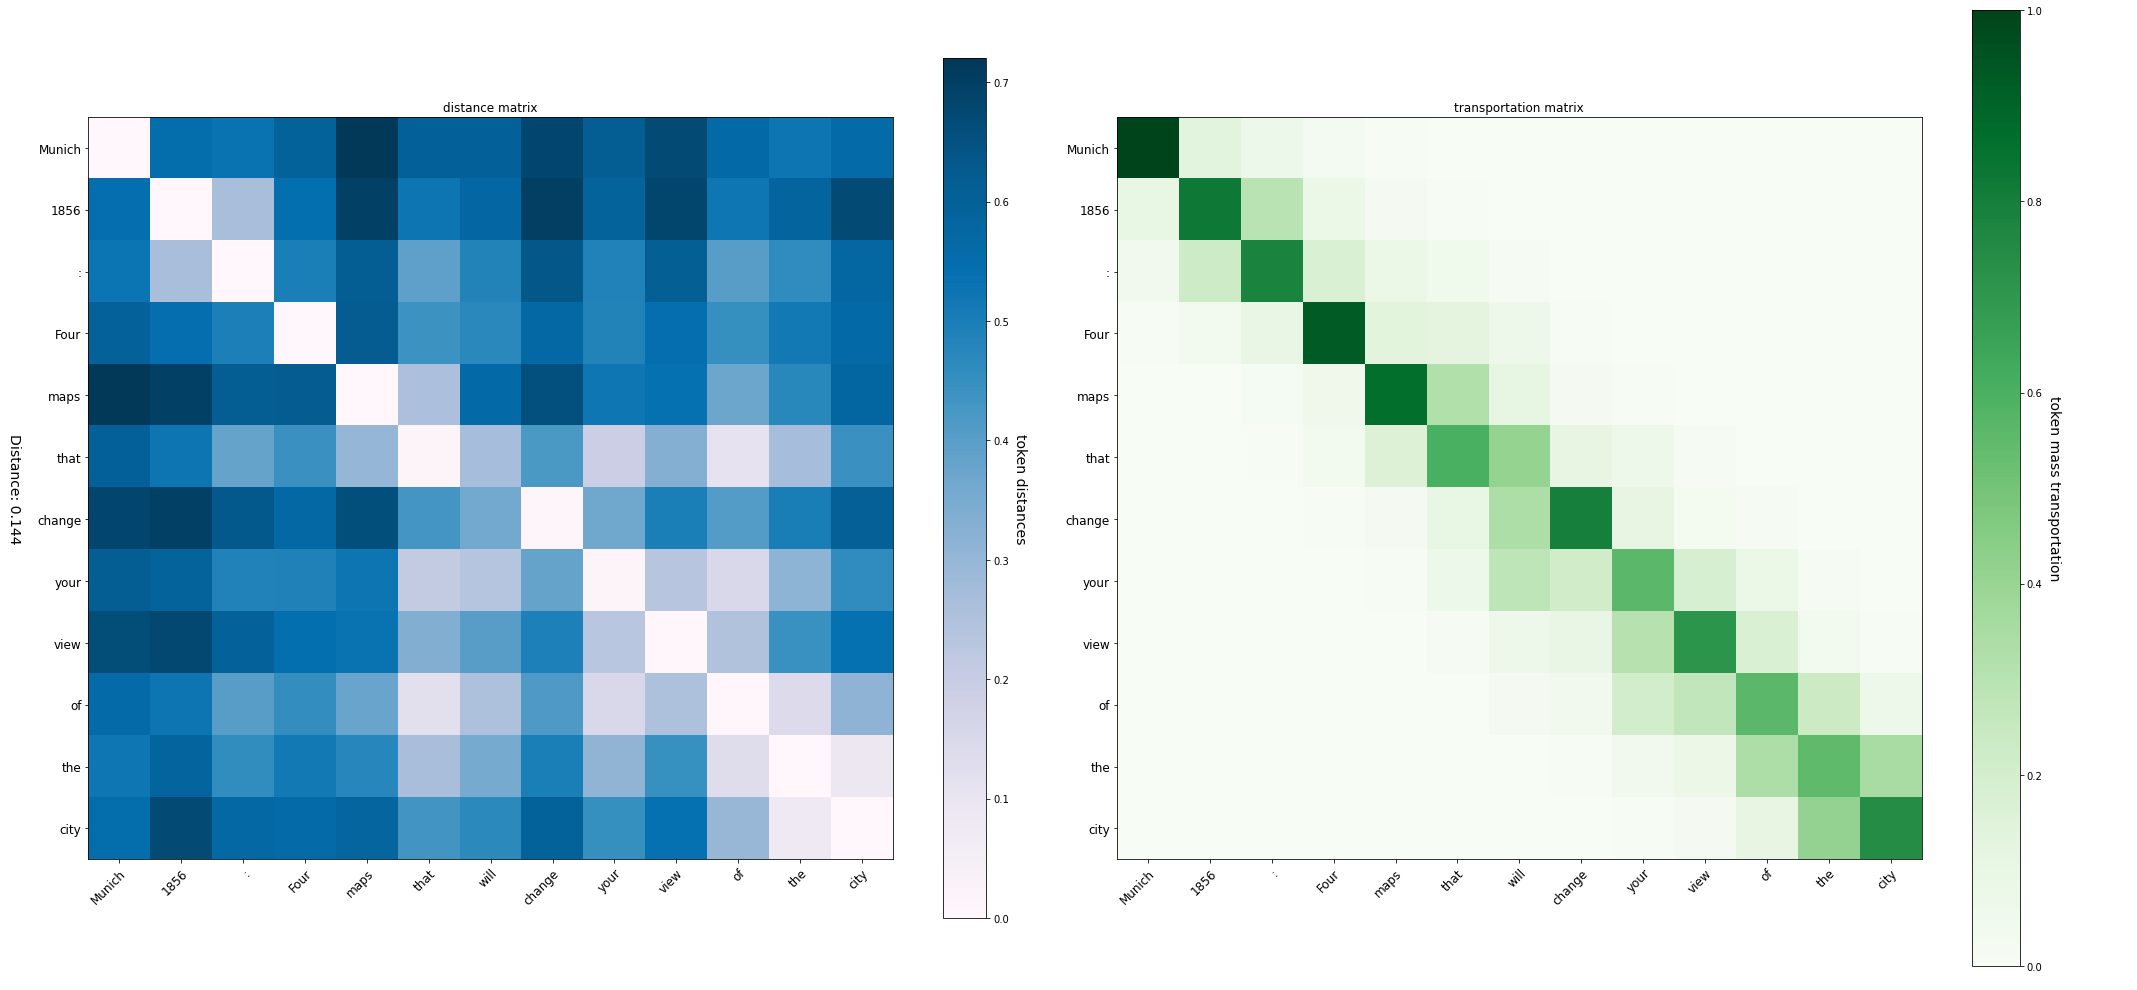

In [13]:
system_text = 'Munich 1856: Four maps that change your view of the city'
references = ['Munich 1856: Four maps that will change your view of the city']
model.visualize(system_text, references)

In [18]:
from src.data.STS import STS

In [19]:
datasets = STS(batch_size=1)
dataloader = datasets.setup().test_dataloader()

['A girl is styling her hair.'] ['A girl is brushing her hair.']
['A group of men play soccer on the beach.'] ['A group of boys are playing soccer on the beach.']
["One woman is measuring another woman's ankle."] ["A woman measures another woman's ankle."]
['A man is cutting up a cucumber.'] ['A man is slicing a cucumber.']
['A man is playing a harp.'] ['A man is playing a keyboard.']
['A woman is cutting onions.'] ['A woman is cutting tofu.']
['A man is riding an electric bicycle.'] ['A man is riding a bicycle.']


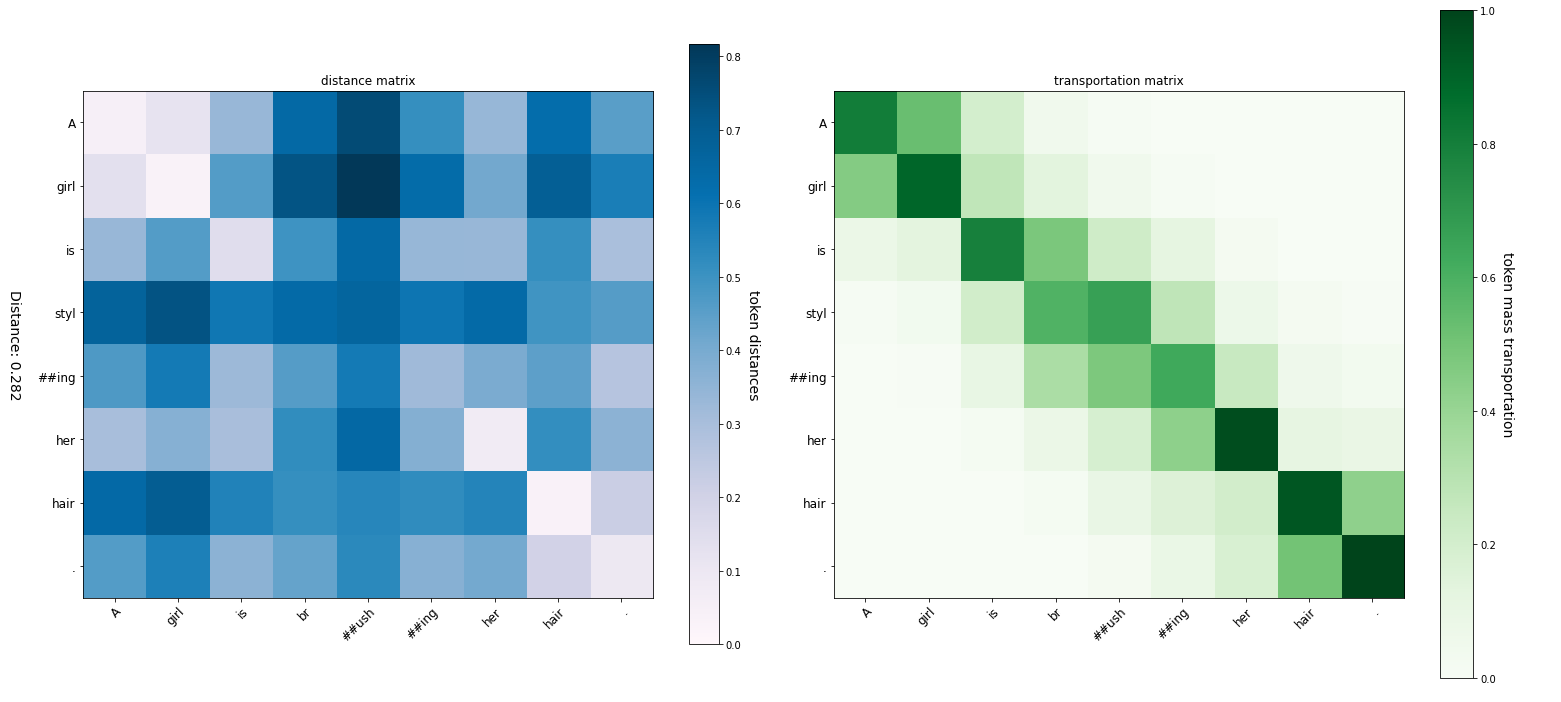

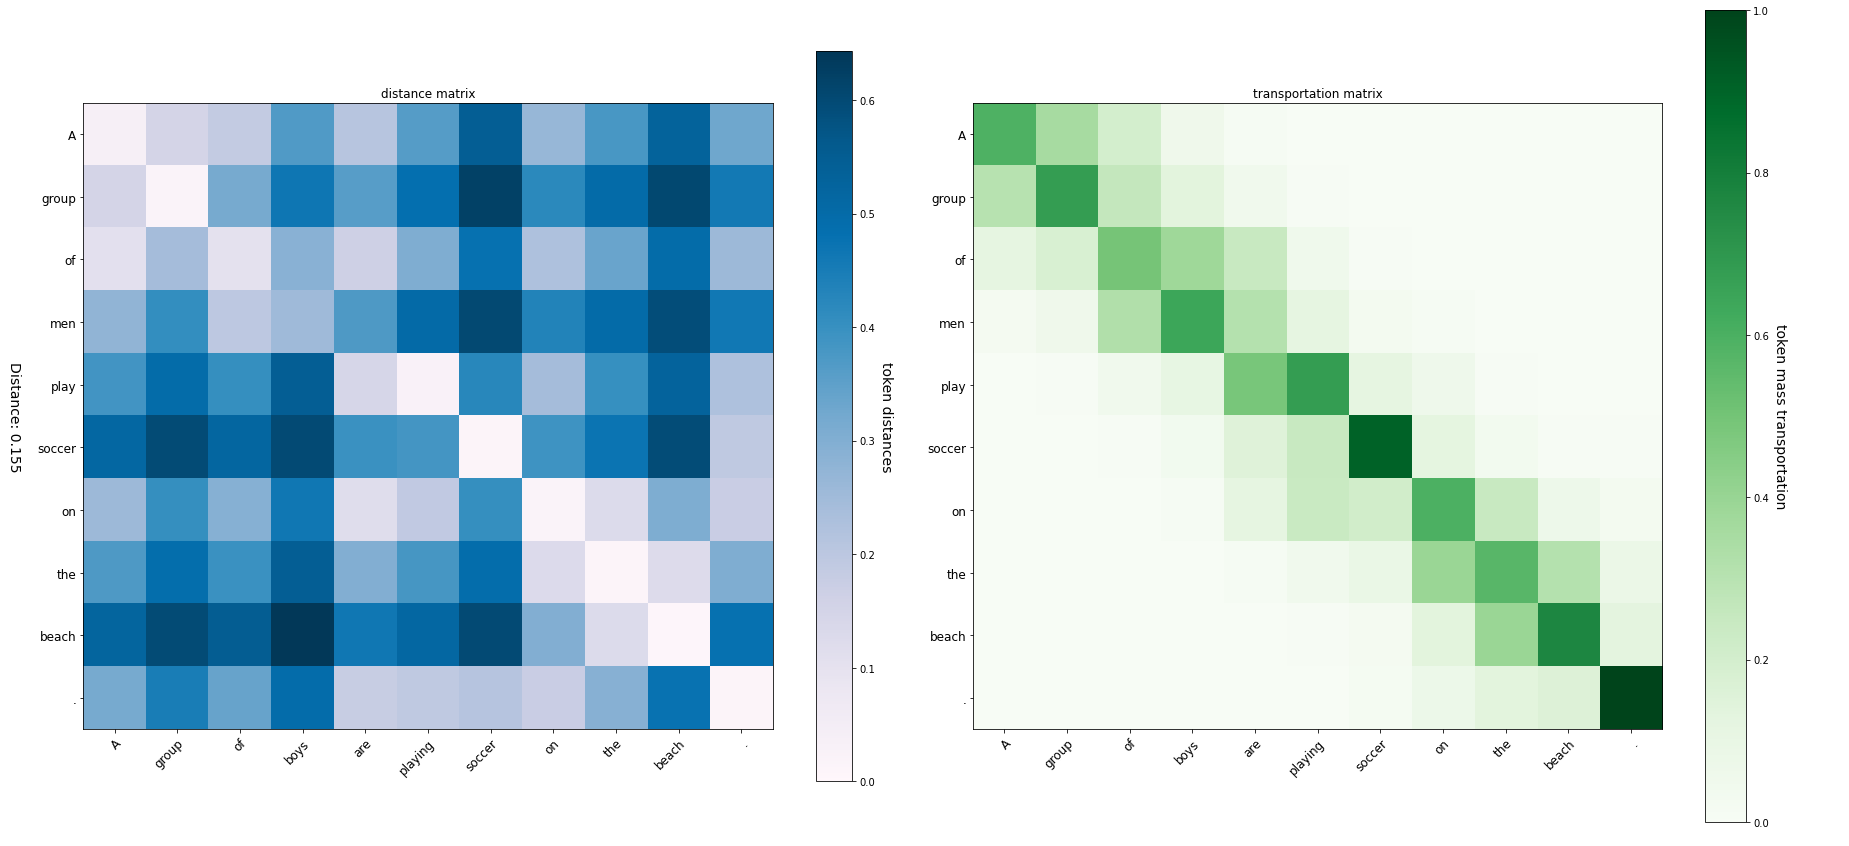

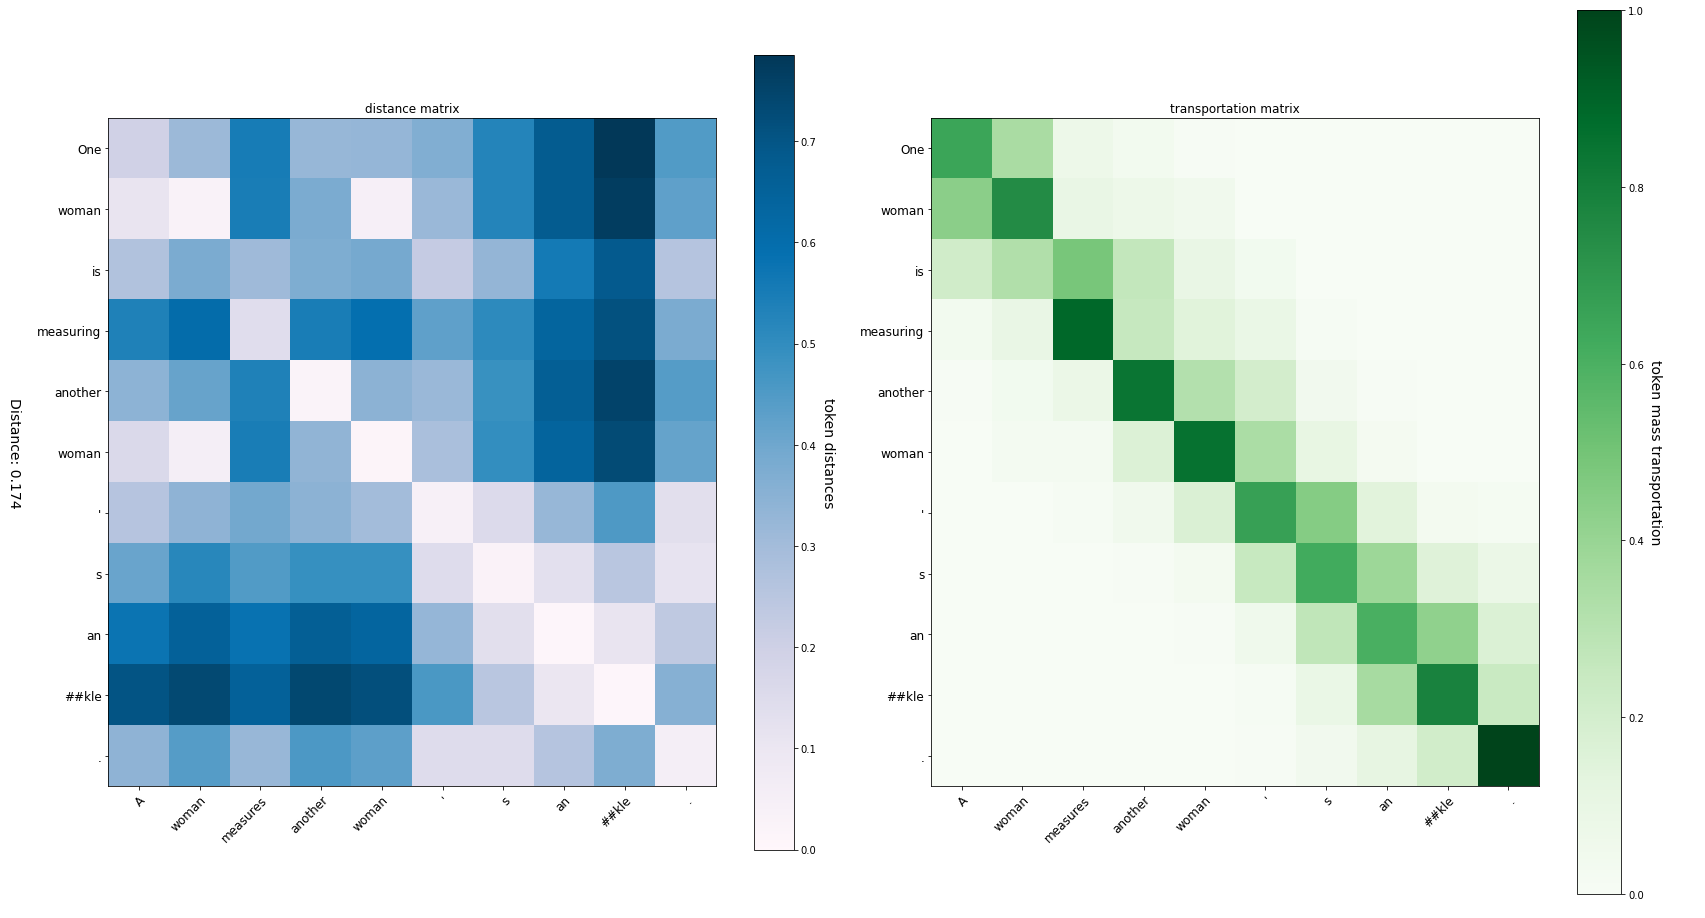

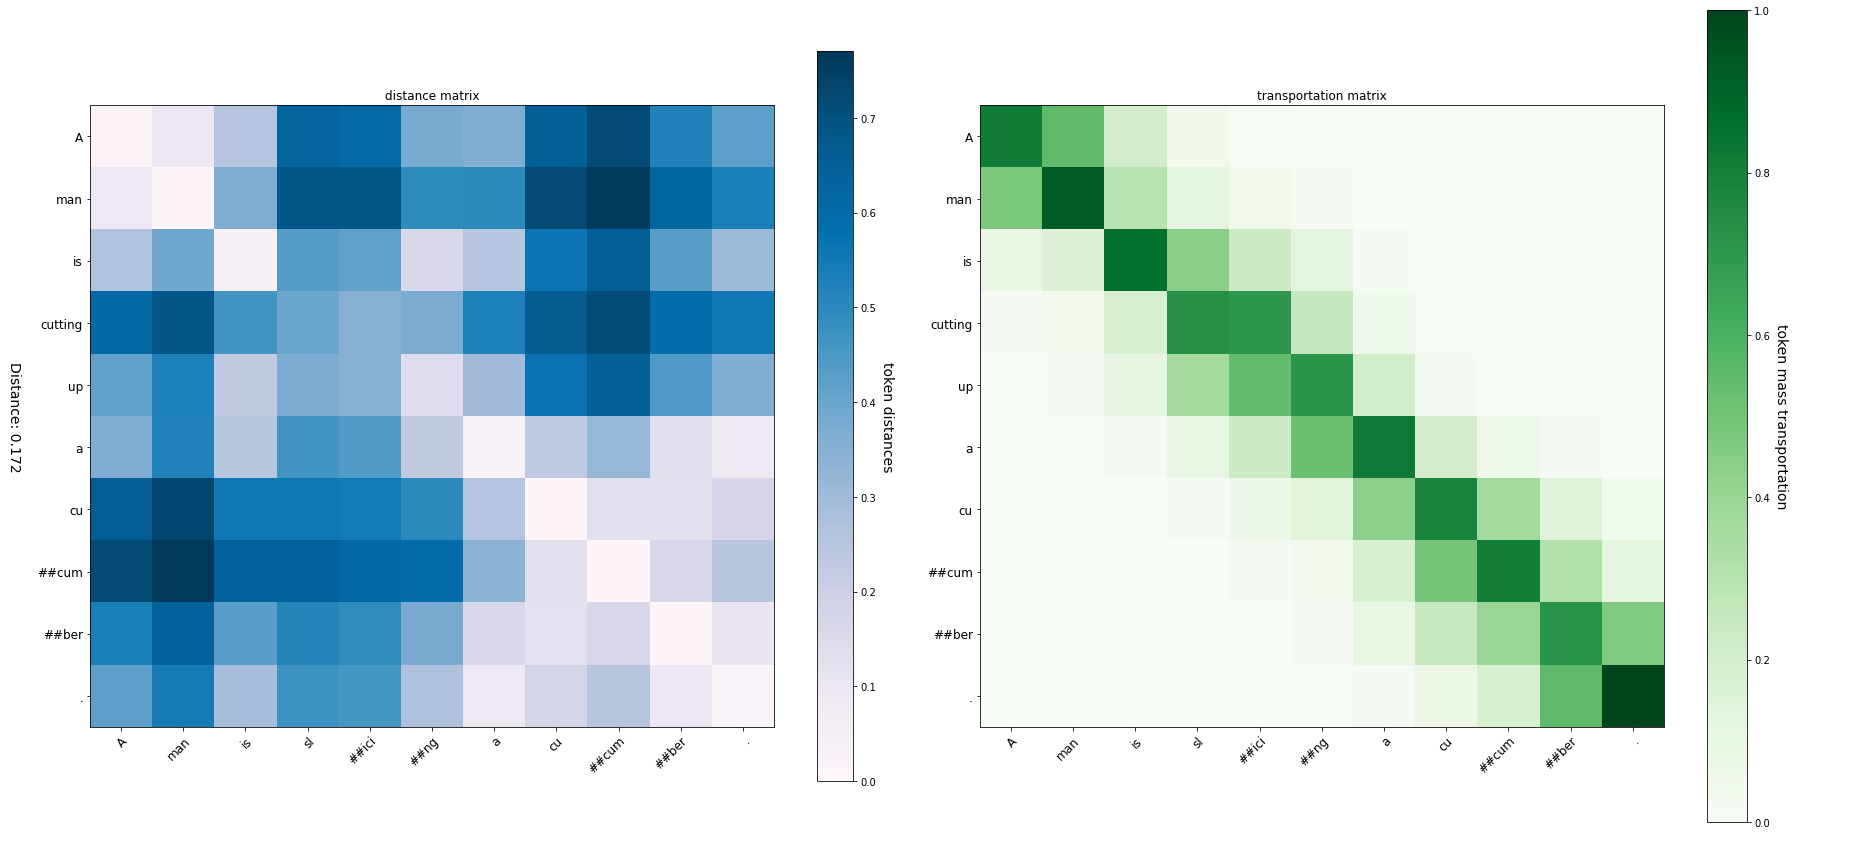

In [20]:
for idx, data in enumerate(dataloader):
    sent1 = data["sentence1"]
    sent2 = data["sentence2"]
    model.visualize(sent1, sent2)
    if idx > 5:
        break